

*   To clarify certain concepts already presented.
*   To explore more advanced concept of the lab materials
*  To provide visualizations to aid deeper understanding of the lab materials
* To apply the materials to real-world datasets to further demonstrate how those materials
can be used.
* To compare different between the various methods, approaches, or models
* To demonstrate the advantages and disadvantages of various methods, approaches, or
models.



# Simple Linear Regression with scikit-learn

To clarify certain concepts already presented

Shape of feature data (X): (6, 1)
Shape of target data (y): (6, 1)


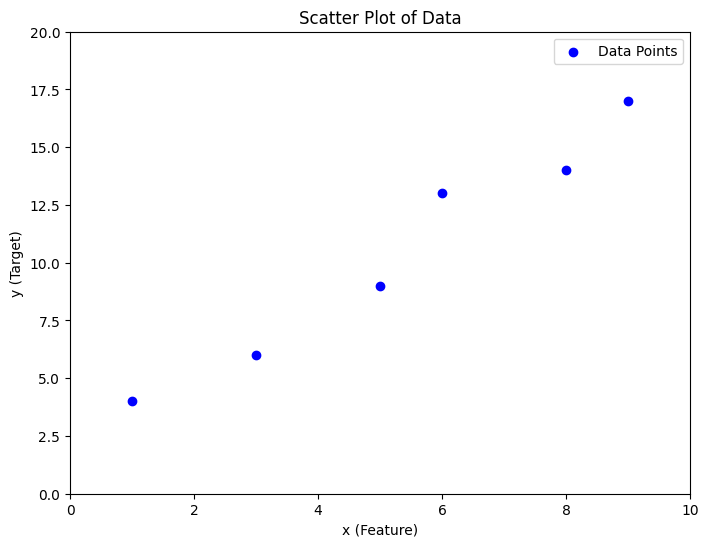

Coefficient of determination (R²): 0.963
Predicted responses based on fitted model:
 [[ 3.42647059]
 [ 6.69117647]
 [ 9.95588235]
 [11.58823529]
 [14.85294118]
 [16.48529412]]
Manually calculated predictions:
 [[ 3.42647059]
 [ 6.69117647]
 [ 9.95588235]
 [11.58823529]
 [14.85294118]
 [16.48529412]]
Are predicted responses identical?  True


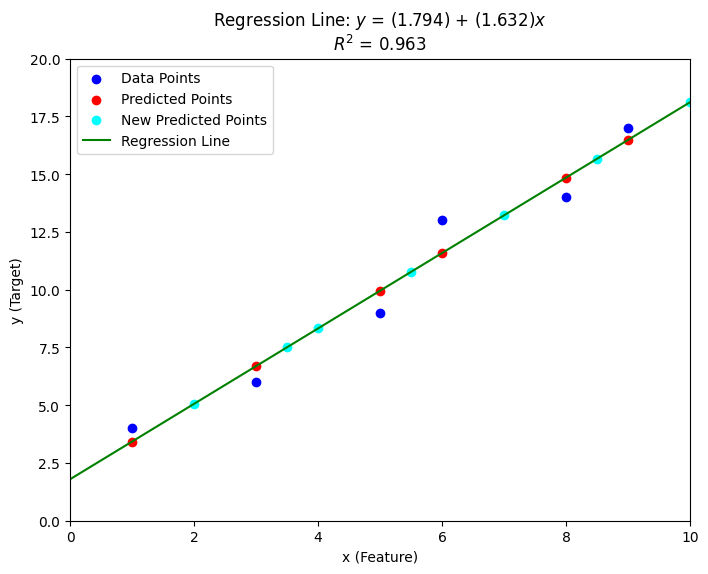

Intercept (b0): [1.79411765]
Slope (b1): [[1.63235294]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Create figure for initial data visualization
plt.figure(figsize=(8, 6))

# Define feature (X) and target (y) data
X = np.array([1, 3, 5, 6, 8, 9]).reshape((-1, 1))  # Reshape for scikit-learn compatibility
y = np.array([4, 6, 9, 13, 14, 17]).reshape((-1, 1))

# Print shapes to understand the input dimensions
print("Shape of feature data (X):", X.shape)
print("Shape of target data (y):", y.shape)

# Plot data points
plt.scatter(X, y, color="blue", label="Data Points")
plt.xlim(0, 10)
plt.ylim(0, 20)
plt.xlabel('x (Feature)')
plt.ylabel('y (Target)')
plt.title("Scatter Plot of Data")

plt.legend()
plt.show()

# Create a LinearRegression model
model = LinearRegression()

# Train the model using the data (fit the line to data)
model.fit(X, y)

# Calculate and display the coefficient of determination (R²)
r_sq = model.score(X, y)  # R² explains how well the model fits the data
print(f"Coefficient of determination (R²): {r_sq:.3f}")

# Predict responses using the fitted model
y_pred = model.predict(X)
print("Predicted responses based on fitted model:\n", y_pred)

# Manually compute predictions using the regression equation
y_pred_eq = model.intercept_ + model.coef_ * X
print("Manually calculated predictions:\n", y_pred_eq)

# Verify that both methods yield the same predictions
print("Are predicted responses identical? ", np.allclose(y_pred, y_pred_eq))

# New data points for prediction
X_new = np.array([2, 3.5, 4, 5.5, 7, 8.5, 10]).reshape((-1, 1))
y_new_pred = model.predict(X_new)

# Visualize original data, predictions, and regression line
plt.figure(figsize=(8, 6))
plt.xlim(0, 10)
plt.ylim(0, 20)
plt.xlabel('x (Feature)')
plt.ylabel('y (Target)')
plt.scatter(X, y, color="blue", label="Data Points")  # Original data points
plt.scatter(X, y_pred, color="red", label="Predicted Points")  # Predicted points on training data
plt.scatter(X_new, y_new_pred, color="cyan", label="New Predicted Points")  # Predictions for new data

# Generate regression line endpoints for visualization
line_X_ends = np.array([[0], [10]])
line_y_ends = model.predict(line_X_ends)
plt.plot(line_X_ends, line_y_ends, color="green", label="Regression Line")

# Annotate the plot with the regression equation and R² value
plt.title(f"Regression Line: $y$ = ({model.intercept_[0]:.3f}) + ({model.coef_[0][0]:.3f})$x$\n$R^2$ = {r_sq:.3f}")
plt.legend()
plt.show()

# Print the regression model's intercept and slope
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_)


Key Enhancements


1.   Clarified Data Shapes:
    *  We reshape X and y into columns (e.g., reshape((-1, 1))) because scikit-learn needs them in a specific format: rows for each data point and columns for features.
   
    *    Like arranging data neatly for the model.


2.   What is R²?:
    *  R² tells us how well the line fits the data.
       *  If R² = 1, the line is perfect.
       *   If R² = 0, the line doesn’t explain the data well.



3. Making Predictions:
  * The model uses the equation of a straight line 𝑦=𝑏0+𝑏1⋅𝑥 to predict y values for given X values.
  * Here, b_0 is the intercept (where the line crosses the y-axis), and b_1 is the slope (how steep the line is).


4. Checking the predictions
  * We compute predictions in two ways:
    * Automatically, using model.predict(X).
    * Manually, using the equation 𝑦=𝑏0+𝑏1⋅𝑥
    * This ensures the model is working as expected.

5. Visualizing the Data:
  * Plot
    * Blue dots for actual data points.
    * Red dots for the model’s predictions.
    * A green line for the best-fit line (the model's learned equation).
  * Makes it easier to see how the line fits the data

6. New Predictions
  * By adding new X values (like 2, 3.5, 4, etc.), we show how the model can predict y values for data it hasn’t seen before. This is useful in real-life situations like predicting future trends.

7. Equation on the Plot:
  * The title of the plot shows the regression equation (𝑦=𝑏0+𝑏1⋅𝑥) and R² value, helping us understand the model visually.
  










# Multiple linear regression with scikit-learn

* To provide visualizations to aid deeper understanding of the lab materials
* To apply the materials to real-world datasets to further demonstrate how those materials can be used.
* To compare different between the various methods, approaches, or models



Import libraries and load pre existing dataset

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd  # For better data display
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load real-world dataset
data = fetch_california_housing(as_frame=True)
X, y = data.data[['MedInc', 'AveRooms']], data.target

# Display a sample of the dataset
print("Feature Sample:")
print(X.head())
print("\nTarget Sample:")
print(y.head())


Feature Sample:
   MedInc  AveRooms
0  8.3252  6.984127
1  8.3014  6.238137
2  7.2574  8.288136
3  5.6431  5.817352
4  3.8462  6.281853

Target Sample:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


Pre-processing data

In [3]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


Training models

In [4]:
# Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Train models and store results
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    print(f"{name} trained successfully.")


Linear Regression trained successfully.
Ridge Regression trained successfully.
Lasso Regression trained successfully.


Evaluation

In [5]:
# Import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate model performance
for name, model in models.items():
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")


Linear Regression -> MSE: 0.71, MAE: 0.62, R2: 0.46
Ridge Regression -> MSE: 0.71, MAE: 0.62, R2: 0.46
Lasso Regression -> MSE: 0.72, MAE: 0.64, R2: 0.45


Linear Regression
  * Simple
  * Prone to overfitting

Ridge Regression
  * Reduce overfitting by penalising large coefficient by adding a regularisation term to the cost function of linear regression.
  * May introduce bias because actively shrinks the coefficients towards zero
  which changes the value of the model parameters

Lasso Regression:
   * Performs feature selection.
   * Can overly shrink coefficients.




# Polynomial Regression with scikit-learn



*   
To apply the materials to real-world dataset to further demonstrate how those materials can be used
*   To demonstrate the advantages and disadvantages of various methods, approaches or models
* To explore more advance concept of the lab materials



Source : https://www.kaggle.com/code/nancyalaswad90/diabetes-database/input



Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the dataset

In [ ]:
df = pd.read_csv('diabetes.csv')

Display some information about the dataset

In [ ]:
print(df.head())  # Display the first 5 rows
print(df.info())  # Dataset structure
print(df.describe())  # Summary statistics

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Select relevant features and target variable

In [ ]:
X = df[['Glucose', 'BMI']]  # Independent variables
y = df['Outcome']  # Target variable (binary)

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Applying polynomial features

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Transformed features (degree=2): {X_train_poly.shape[1]}")

Original features: 2
Transformed features (degree=2): 5


Scaling the features

In [ ]:
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

Training polynomial regression model

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

Evaluating the model

In [ ]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.3f}, Train R²: {train_r2:.3f}")
print(f"Test MSE: {test_mse:.3f}, Test R²: {test_r2:.3f}")

Train MSE: 0.164, Train R²: 0.275
Test MSE: 0.170, Test R²: 0.260


Visualisation

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Actual vs predicted

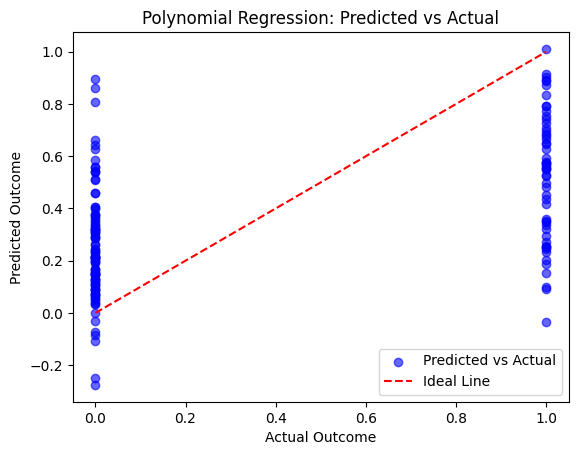

In [ ]:
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Line')

plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.legend()
plt.show()




*   The predictions for Outcome = 0 and Outcome = 1 seem clustered, as expected for a binary classification target.
*   Polynomial regression may predict continuous values, which are then close to 0 or 1 but not exactly binary, leading to slight scatter around these clusters.



Compare linear and polynomial regression

Simple regression model training for comparison

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_linear_pred = linear_model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_linear_pred)
linear_r2 = r2_score(y_test, y_linear_pred)

print(f"Linear Regression Test MSE: {linear_mse:.3f}, Test R²: {linear_r2:.3f}")
print(f"Polynomial Regression Test MSE: {test_mse:.3f}, Test R²: {test_r2:.3f}")

Linear Regression Test MSE: 0.172, Test R²: 0.252
Polynomial Regression Test MSE: 0.170, Test R²: 0.260
